**************************************************************************
Analysis of data on cases and deaths from COVID-19 in the States of Mexico
**************************************************************************

In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
dfsc = pd.read_csv('C:/Users/angel/covidmx/Data/Casos_Diarios_Estado_Nacional_Confirmados_20210621.csv')

We remove the "nacional" element

In [3]:
dfsc = dfsc.query("nombre != 'Nacional'").copy()
dfsc.head().loc[:, ['nombre', 'poblacion']]

,nombre,poblacion
0,AGUASCALIENTES,1434635
1,BAJA CALIFORNIA,3634868
2,BAJA CALIFORNIA SUR,804708
3,CAMPECHE,1000617
4,CHIAPAS,5730367


************************************
The 10 most populous states in Mexico are
************************************

In [4]:
maxpop=dfsc.nlargest((10), 'poblacion')
maxpop.loc[:, ['nombre', 'poblacion']]

,nombre,poblacion
14,MEXICO,17427790
6,DISTRITO FEDERAL,9018645
29,VERACRUZ,8539862
13,JALISCO,8409693
20,PUEBLA,6604451
10,GUANAJUATO,6228175
4,CHIAPAS,5730367
18,NUEVO LEON,5610153
15,MICHOACAN,4825401
19,OAXACA,4143593


************************************
confirmed cases by states
************************************

In [5]:
dfsc

,cve_ent,poblacion,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,12-06-2021,13-06-2021,14-06-2021,15-06-2021,16-06-2021,17-06-2021,18-06-2021,19-06-2021,20-06-2021,21-06-2021
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,0,1,10,10,3,5,1,1,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,9,15,64,48,54,38,19,6,6,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,146,127,367,289,297,274,185,106,64,2
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,25,26,79,56,77,60,42,18,5,0
4,7,5730367,CHIAPAS,0,0,0,0,0,0,0,...,20,19,50,33,29,35,29,16,3,0
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,8,15,47,44,21,16,7,0,0,0
6,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,422,137,889,858,838,837,779,386,115,0
7,5,3218720,COAHUILA,0,0,0,0,0,0,0,...,7,5,28,31,26,25,23,8,5,0
8,6,785153,COLIMA,0,0,0,0,0,0,0,...,13,3,7,10,18,18,5,3,2,0
9,10,1868996,DURANGO,0,0,0,0,0,0,0,...,8,3,24,17,21,17,11,1,0,0


In [6]:
dfsc.shape

(32, 542)

**********************************************************************************************
The number of cases of covid-19 by states reported in Mexico since the pandemic until now are
**********************************************************************************************

In [7]:
dfsc['total'] = dfsc.iloc[:, -539:-1].sum(axis=1)
dfsc.sort_values('total',inplace=True, ascending = False)
dfsc.loc[:, ['nombre', 'total']]

,nombre,total
6,DISTRITO FEDERAL,673666
14,MEXICO,256711
10,GUANAJUATO,132654
18,NUEVO LEON,126087
13,JALISCO,88151
20,PUEBLA,85952
25,SONORA,77872
26,TABASCO,73707
21,QUERETARO,69570
7,COAHUILA,69397


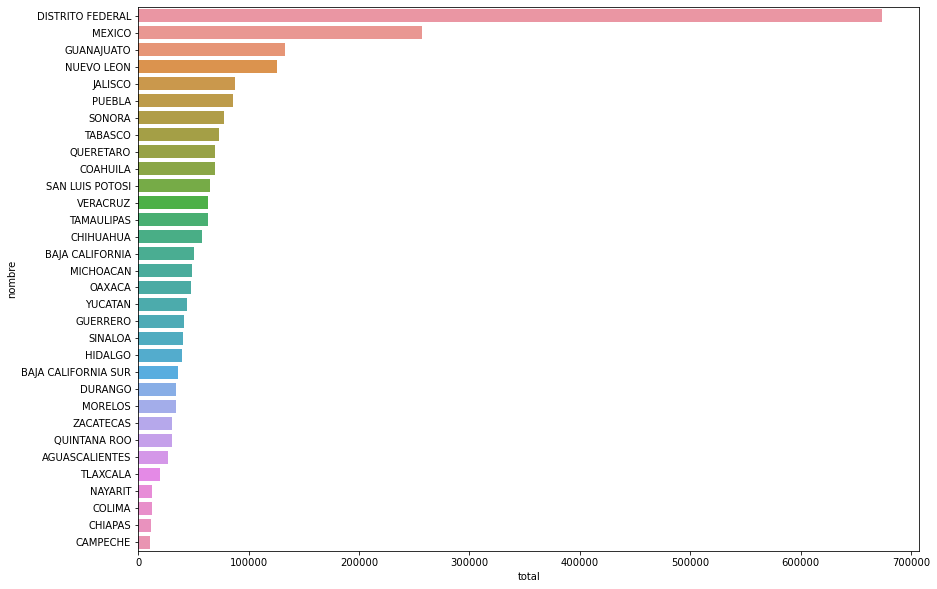

In [8]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=dfsc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The 10 states with the highest number of reported cases with covid -19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [9]:
mcdfsc=dfsc.nlargest((10), 'total')
mcdfsc.loc[:, ['nombre', 'total']]

,nombre,total
6,DISTRITO FEDERAL,673666
14,MEXICO,256711
10,GUANAJUATO,132654
18,NUEVO LEON,126087
13,JALISCO,88151
20,PUEBLA,85952
25,SONORA,77872
26,TABASCO,73707
21,QUERETARO,69570
7,COAHUILA,69397


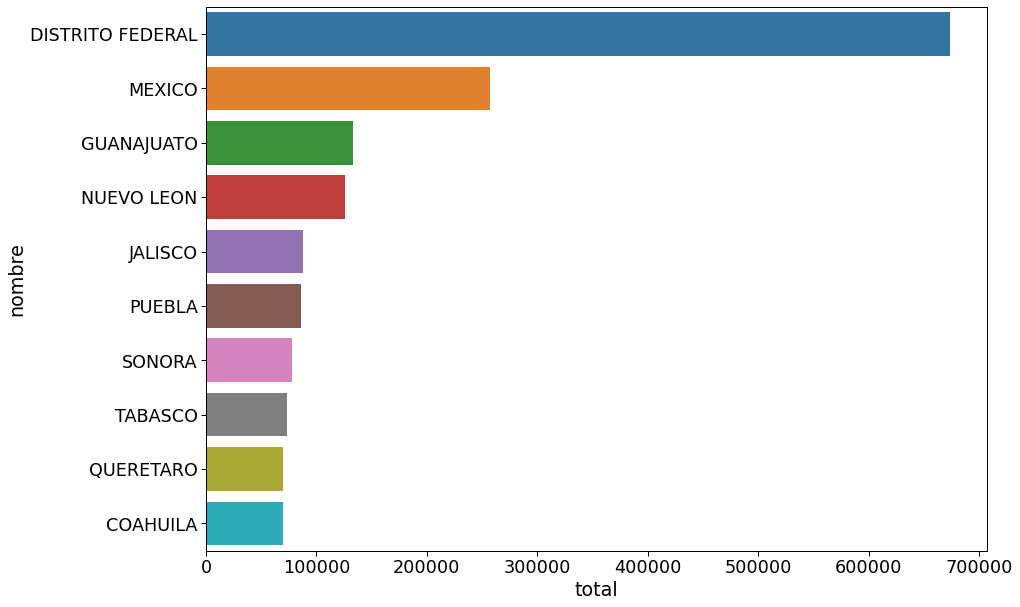

In [10]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=mcdfsc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of cases of covid-19 by states reported in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [11]:
dfsc['rate'] = (dfsc['total']/dfsc['poblacion'])*100000
dfsc.sort_values('rate',inplace=True, ascending = False)
dfsc.head().loc[:, ['nombre', 'total', 'rate']]

,nombre,total,rate
6,DISTRITO FEDERAL,673666,7469.703043
2,BAJA CALIFORNIA SUR,36317,4513.065609
21,QUERETARO,69570,3051.801668
26,TABASCO,73707,2865.426758
25,SONORA,77872,2532.632787


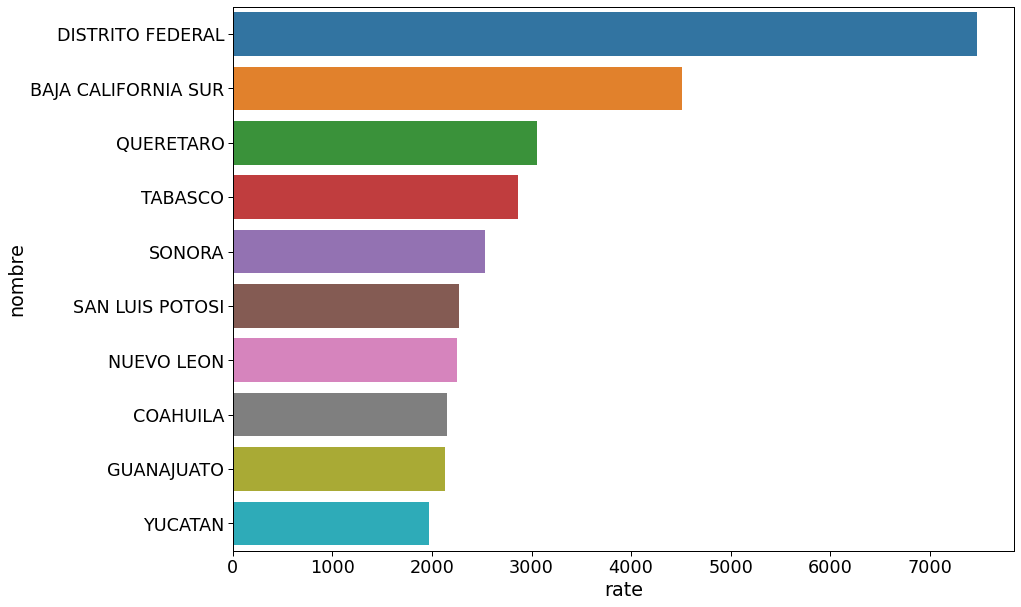

In [12]:
maxratesc=dfsc.nlargest((10), 'rate')
plt.figure(figsize=(14,10))
sns.barplot(x="rate", y="nombre", data=maxratesc)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of cases of covid-19 by states reported during the last 60 days in Mexico are
**********************************************************************************************

In [13]:
dfsc['total60'] = dfsc.iloc[:, -63:-3].sum(axis=1)
dfsc['rate60'] = (dfsc['total60']/dfsc['poblacion'])*100000
dfsc.sort_values('rate60',inplace=True, ascending = False)
dfsc.head().loc[:, ['nombre', 'total', 'rate', 'total60', 'rate60']]

,nombre,total,rate,total60,rate60
2,BAJA CALIFORNIA SUR,36317,4513.065609,6423,798.177724
22,QUINTANA ROO,30733,1783.423153,8056,467.486315
26,TABASCO,73707,2865.426758,10432,405.553502
6,DISTRITO FEDERAL,673666,7469.703043,33694,373.603795
30,YUCATAN,44434,1966.891211,7614,337.037171


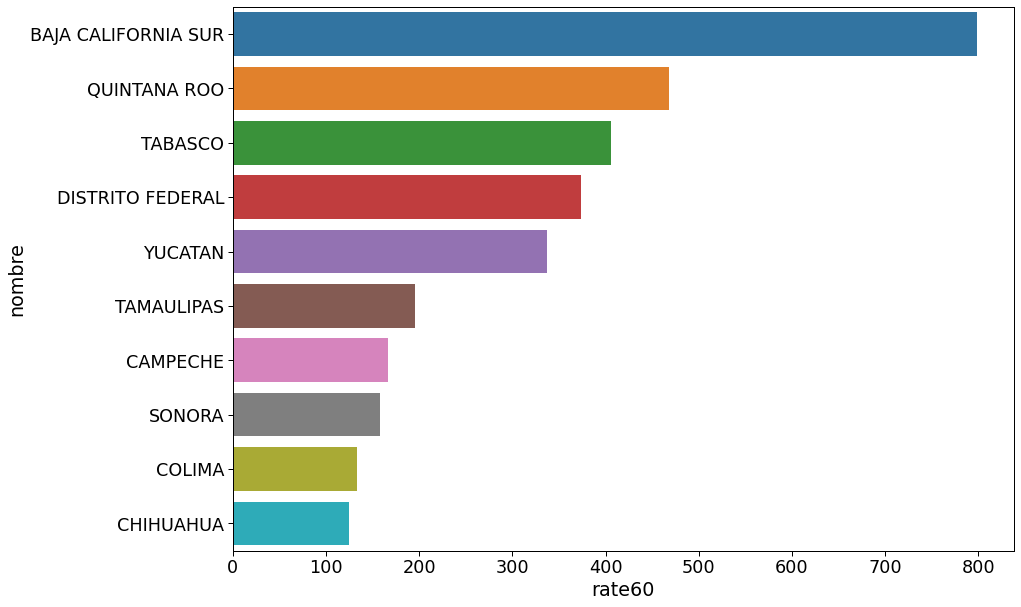

In [14]:
maxrate60sc=dfsc.nlargest((10), 'rate60')
plt.figure(figsize=(14,10))
sns.barplot(x="rate60", y="nombre", data=maxrate60sc)
sns.set_context('paper', font_scale=2)

dfsc[['nombre', 'total']]

The 10 top of positive cases of COVID-19 by states in Mexico are...

mcdfsc[['nombre','total']]

dfsc.head()

maxratesc.loc[:, ['nombre', 'total', 'rates']]

maxrate60sc.loc[:, ['nombre', 'total60', 'rates60']]

********************************
deaths by states
********************************

In [15]:
dfsd = pd.read_csv('C:/Users/angel/covidmx/Data/Casos_Diarios_Estado_Nacional_Defunciones_20210621.csv')

We remove the "nacional" element

In [16]:
dfsd = dfsd.query("nombre != 'Nacional'").copy()
dfsd.shape

(32, 521)

************************************
covid deaths by states
************************************

In [17]:
dfsd['total'] = dfsd.iloc[:, -518:-1].sum(axis=1)
dfsd.sort_values('total',inplace=True, ascending = False)
dfsd.loc[:, ['nombre', 'total']]

,nombre,total
14,MEXICO,37211
6,DISTRITO FEDERAL,34461
13,JALISCO,12605
20,PUEBLA,12173
10,GUANAJUATO,11079
29,VERACRUZ,10063
18,NUEVO LEON,9692
1,BAJA CALIFORNIA,8648
5,CHIHUAHUA,7493
25,SONORA,6739


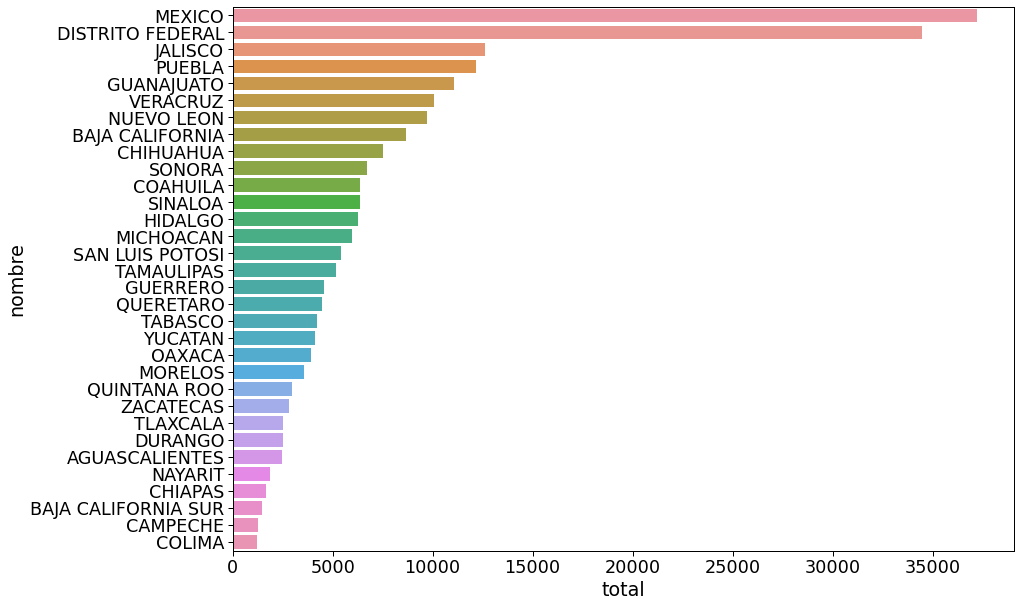

In [18]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=dfsd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The 10 states with the highest number of death by covid -19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [19]:
mddfsd=dfsd.nlargest((10), 'total')
mddfsd[['nombre','total']]

,nombre,total
14,MEXICO,37211
6,DISTRITO FEDERAL,34461
13,JALISCO,12605
20,PUEBLA,12173
10,GUANAJUATO,11079
29,VERACRUZ,10063
18,NUEVO LEON,9692
1,BAJA CALIFORNIA,8648
5,CHIHUAHUA,7493
25,SONORA,6739


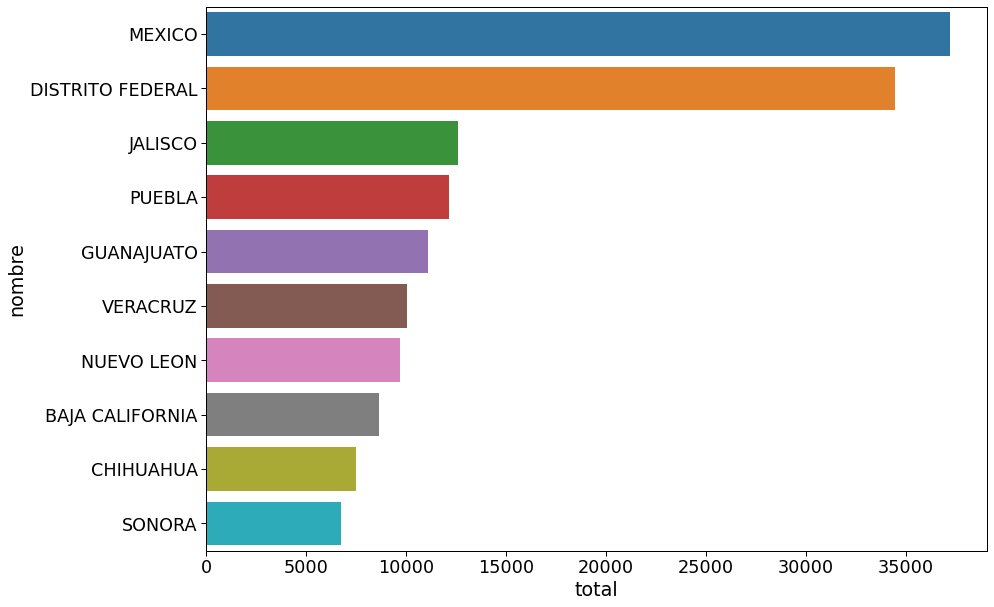

In [20]:
plt.figure(figsize=(14,10))
sns.barplot(x="total", y="nombre", data=mddfsd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of death by covid-19 in Mexico since the beginning of the pandemic until now are
**********************************************************************************************

In [21]:
dfsd['rate'] = (dfsd['total']/dfsd['poblacion'])*100000
dfsd.sort_values('rate',inplace=True, ascending = False)
dfsd.head().loc[:, ['nombre', 'total', 'rate']]

,nombre,total,rate
6,DISTRITO FEDERAL,34461,382.108399
1,BAJA CALIFORNIA,8648,237.917856
25,SONORA,6739,219.172647
14,MEXICO,37211,213.515311
12,HIDALGO,6268,203.083579


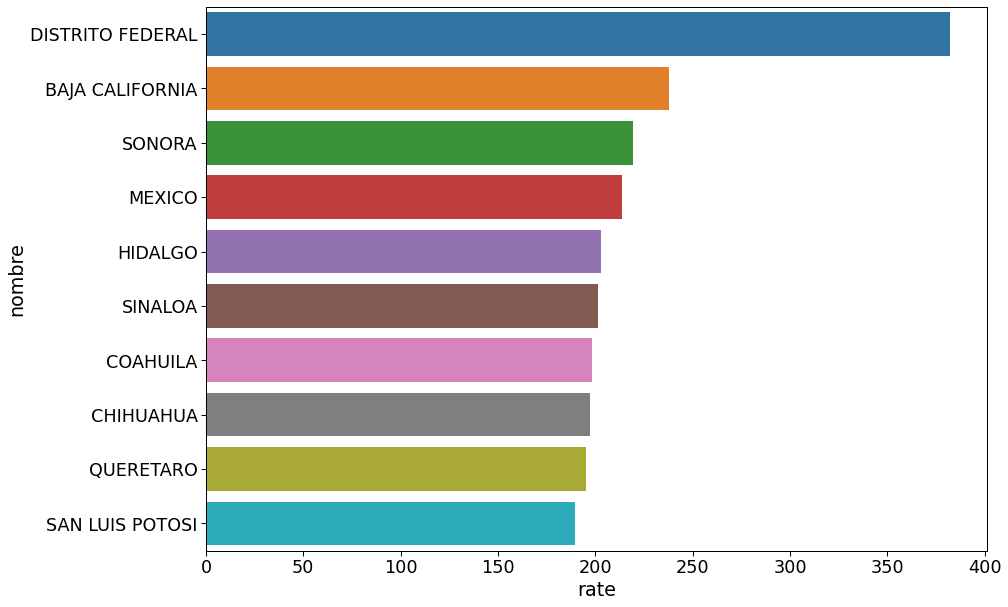

In [22]:
maxratesd=dfsd.nlargest((10), 'rate')
plt.figure(figsize=(14,10))
sns.barplot(x="rate", y="nombre", data=maxratesd)
sns.set_context('paper', font_scale=2)

**********************************************************************************************
The ratio of deaths by covid-19 by states reported during the last 60 days in Mexico are
**********************************************************************************************

In [23]:
dfsd['total60'] = dfsd.iloc[:, -63:-3].sum(axis=1)
dfsd['rate60'] = (dfsd['total60']/dfsd['poblacion'])*100000
dfsd.sort_values('rate60',inplace=True, ascending = False)
dfsd.head().loc[:, ['nombre', 'total', 'rate', 'total60', 'rate60']]

,nombre,total,rate,total60,rate60
22,QUINTANA ROO,2943,170.781061,341,19.788088
30,YUCATAN,4101,181.532629,344,15.227316
2,BAJA CALIFORNIA SUR,1486,184.663257,118,14.663704
5,CHIHUAHUA,7493,197.107079,420,11.048308
16,MORELOS,3550,173.674133,172,8.414634


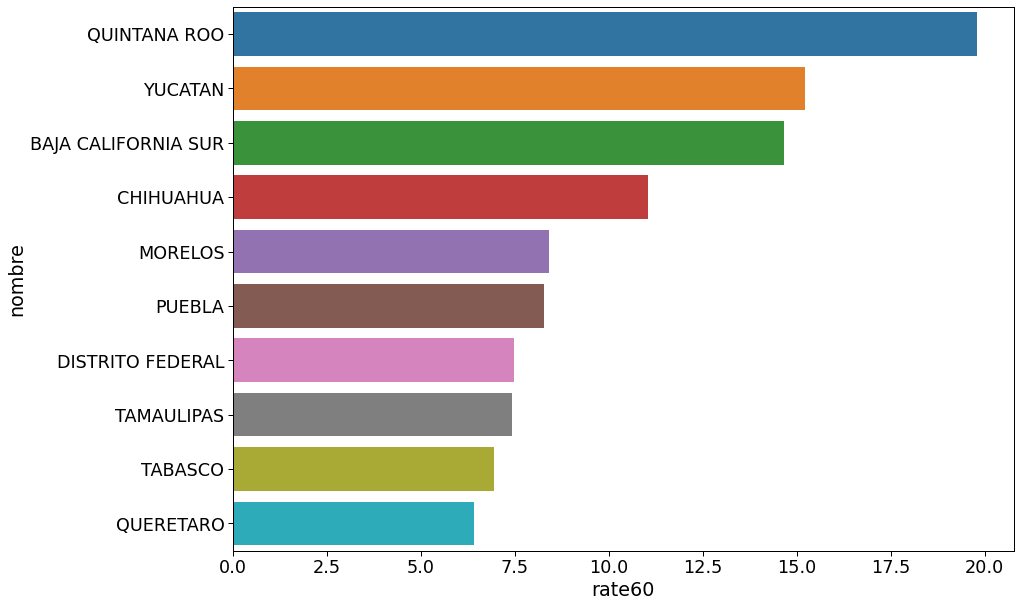

In [24]:
maxrate60sd=dfsd.nlargest((10), 'rate60')
plt.figure(figsize=(14,10))
sns.barplot(x="rate60", y="nombre", data=maxrate60sd)
sns.set_context('paper', font_scale=2)

In [25]:
dfsmerge= pd.merge(dfsc, dfsd, on='nombre', how='outer')
#dfsmerge.head().loc[:, ['nombre', 'total_x', 'total_y']]
dfsmerge.head()

,cve_ent_x,poblacion_x,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,15-06-2021_y,16-06-2021_y,17-06-2021_y,18-06-2021_y,19-06-2021_y,20-06-2021_y,total_y,rate_y,total60_y,rate60_y
0,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,1,4,2,0,0,0,1486,184.663257,118,14.663704
1,23,1723259,QUINTANA ROO,0,0,0,0,0,0,0,...,5,6,10,4,5,3,2943,170.781061,341,19.788088
2,27,2572287,TABASCO,0,0,0,0,0,0,0,...,2,2,2,1,1,2,4234,164.600606,179,6.958788
3,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,5,6,9,3,2,0,34461,382.108399,675,7.484495
4,31,2259098,YUCATAN,0,0,0,0,0,0,0,...,13,4,11,5,11,4,4101,181.532629,344,15.227316


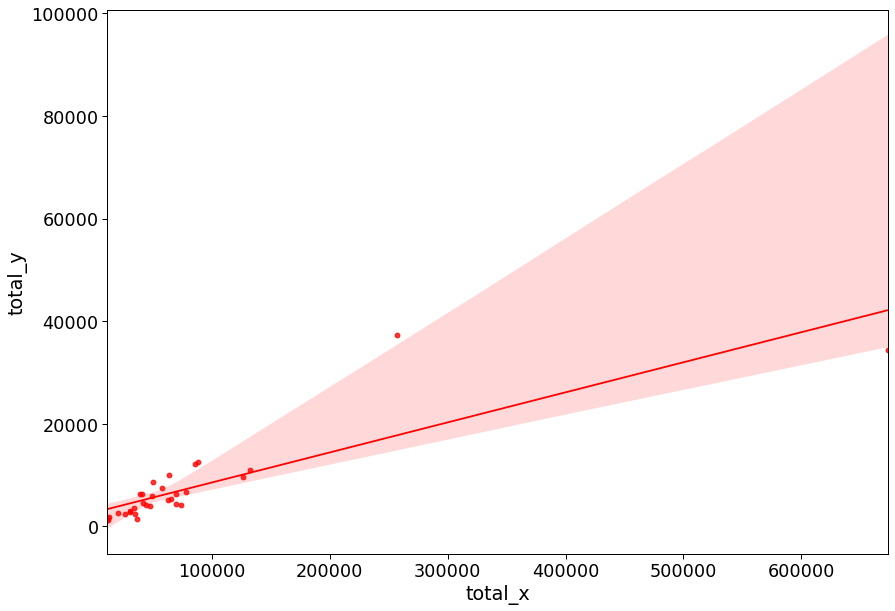

In [26]:
plt.figure(figsize=(14,10))
ax = sns.regplot(x="total_x", y="total_y", data=dfsmerge, color="r")
sns.set_context('paper', font_scale=2)

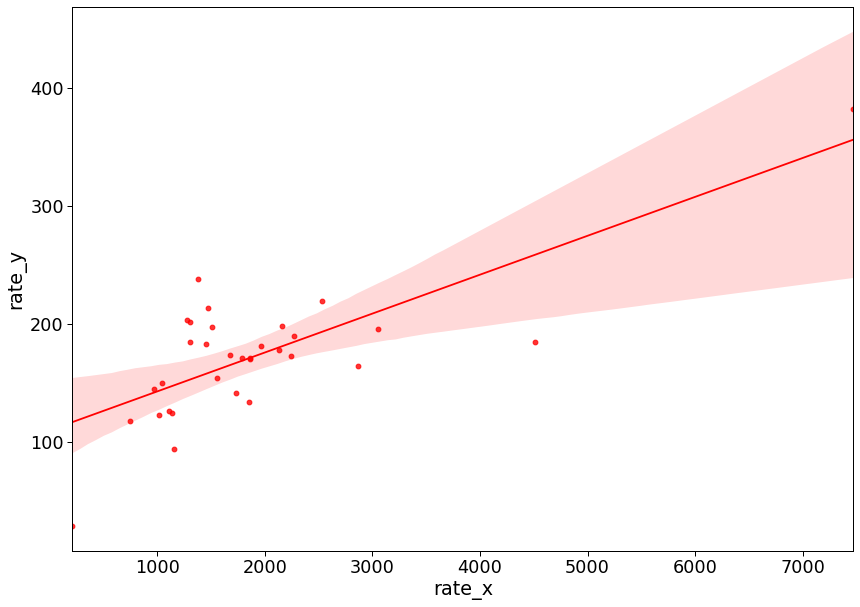

In [27]:
plt.figure(figsize=(14,10))
ax = sns.regplot(x="rate_x", y="rate_y", data=dfsmerge, color="r")
sns.set_context('paper', font_scale=2)

In [28]:
dfsmerge.head()

,cve_ent_x,poblacion_x,nombre,31-12-2019,01-01-2020,02-01-2020,03-01-2020,04-01-2020,05-01-2020,06-01-2020,...,15-06-2021_y,16-06-2021_y,17-06-2021_y,18-06-2021_y,19-06-2021_y,20-06-2021_y,total_y,rate_y,total60_y,rate60_y
0,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,1,4,2,0,0,0,1486,184.663257,118,14.663704
1,23,1723259,QUINTANA ROO,0,0,0,0,0,0,0,...,5,6,10,4,5,3,2943,170.781061,341,19.788088
2,27,2572287,TABASCO,0,0,0,0,0,0,0,...,2,2,2,1,1,2,4234,164.600606,179,6.958788
3,9,9018645,DISTRITO FEDERAL,0,0,0,0,0,0,0,...,5,6,9,3,2,0,34461,382.108399,675,7.484495
4,31,2259098,YUCATAN,0,0,0,0,0,0,0,...,13,4,11,5,11,4,4101,181.532629,344,15.227316


In [29]:
dfsFinal =  dfsmerge.loc[:, ['nombre', 'poblacion_x', 'total_x', 'rate_x', 'total60_x', 'rate60_x', 'total_y', 'rate_y', 'total60_y', 'rate60_y']].copy()
dfsFinal.head()

,nombre,poblacion_x,total_x,rate_x,total60_x,rate60_x,total_y,rate_y,total60_y,rate60_y
0,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
1,QUINTANA ROO,1723259,30733,1783.423153,8056,467.486315,2943,170.781061,341,19.788088
2,TABASCO,2572287,73707,2865.426758,10432,405.553502,4234,164.600606,179,6.958788
3,DISTRITO FEDERAL,9018645,673666,7469.703043,33694,373.603795,34461,382.108399,675,7.484495
4,YUCATAN,2259098,44434,1966.891211,7614,337.037171,4101,181.532629,344,15.227316


In [30]:
dfsFinal.rename(columns = {'poblacion_x':'population', 'nombre': 'state', 'total_x': 'total_cases','rate_x': 'cases_rates', 'total60_x' : 'total_cases_last_60_days', 'rate60_x':'cases_rate_last_60_days', 'total_y': 'total_deaths','rate_y': 'deaths_rates','total60_y': 'total_deaths_last_60_days', 'rate60_y':'deaths_rate_last_60_days'}, inplace=True)
dfsFinal.sort_values(by=['state'], ascending = True, inplace=True)
dfsFinal

,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days
20,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964
17,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503
0,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
6,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424
31,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388
9,CHIHUAHUA,3801487,57486,1512.197727,4742,124.740661,7493,197.107079,420,11.048308
26,COAHUILA,3218720,69397,2156.043396,1391,43.215937,6376,198.091167,70,2.174778
8,COLIMA,785153,12208,1554.856187,1043,132.840351,1210,154.110091,34,4.330366
3,DISTRITO FEDERAL,9018645,673666,7469.703043,33694,373.603795,34461,382.108399,675,7.484495
16,DURANGO,1868996,34588,1850.619263,1238,66.238772,2495,133.494133,72,3.852336


In [31]:
dfsFinal.to_csv('../Data/week1analyzes.csv', index=False)